In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Water Underground Displacement

(0.0, 1.0)

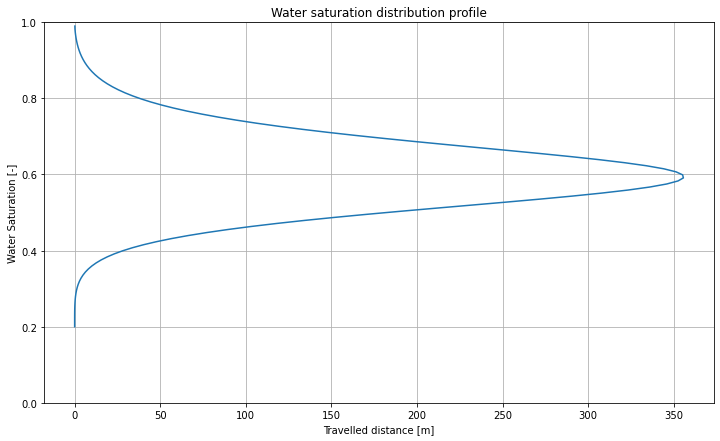

In [2]:
Sor=0.2                        # Residual oil saturation [-]
Swc=0.2                        # Initial water saturation [-]
mu_w=0.5                       # Water viscosity
mu_o=2.5                       # Oil viscosity
n=2.5                          # Corey oil exponent [-]
m=4.8                          # Corey water exponent [-]

phi = 0.15                     # Porosity [-]
A = 25                         # Cross-sectional area [m^2]
iw = 0.20                      # Injection rate (water) [m^3/day]
t = 1461                       # Duration of injection [days]


Sw = np.linspace(Swc,0.99,100)     # Water saturation [-]
L = 500
kro = ((1-Sw)/(1-Swc))**n     # Water relative permeability
krw = ((Sw-Swc)/(1-Swc))**m   # Oil relative permeability
M=(krw*mu_o)/(kro*mu_w)     # Mobility Ratio
fw = M/(M+1)                  # Water frational flow
dfw = np.gradient(fw,Sw)              # Derivative of water fractional flow [-] 
x = iw*t/(A*phi)*dfw

# ===================================Plot===================================
plt.figure(figsize=(12, 7))
plt.plot(x,Sw)
plt.xlabel('Travelled distance [m]')
plt.ylabel('Water Saturation [-]')
plt.title('Water saturation distribution profile')
plt.grid()
#xlim([0 400]); 
plt.ylim(0,1.0)

In [3]:
dfw

array([1.59437910e-07, 2.27771877e-06, 1.62826077e-05, 6.45216652e-05,
       1.83752195e-04, 4.26153303e-04, 8.60913358e-04, 1.57617322e-03,
       2.68129086e-03, 4.30942748e-03, 6.62046661e-03, 9.80428090e-03,
       1.40843596e-02, 1.97218034e-02, 2.70196833e-02, 3.63277420e-02,
       4.80473940e-02, 6.26369443e-02, 8.06169028e-02, 1.02575208e-01,
       1.29172099e-01, 1.61144266e-01, 1.99307799e-01, 2.44559291e-01,
       2.97874282e-01, 3.60302021e-01, 4.32955311e-01, 5.16993983e-01,
       6.13600351e-01, 7.23944862e-01, 8.49140168e-01, 9.90182028e-01,
       1.14787594e+00, 1.32274926e+00, 1.51495002e+00, 1.72413546e+00,
       1.94935592e+00, 2.18894261e+00, 2.44041094e+00, 2.70039368e+00,
       2.96462029e+00, 3.22795826e+00, 3.48452978e+00, 3.72791102e+00,
       3.95141224e+00, 4.14842522e+00, 4.31281279e+00, 4.43930446e+00,
       4.52385631e+00, 4.56393352e+00, 4.55868133e+00, 4.50896397e+00,
       4.41726856e+00, 4.28748871e+00, 4.12461737e+00, 3.93438719e+00,
      

# Fractional Flow

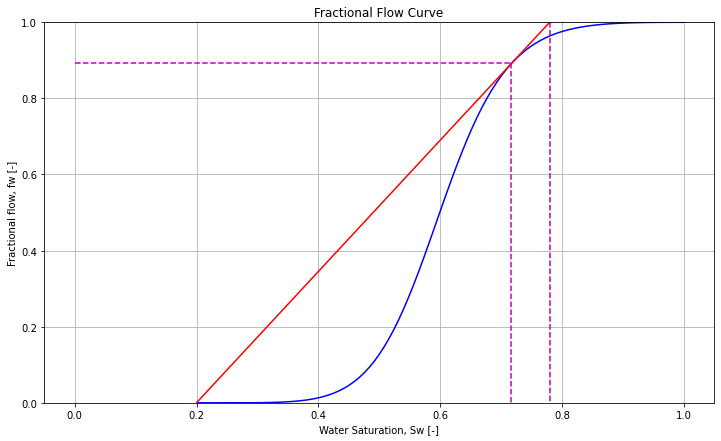

In [6]:
# ========Plotting the Fractional flow curve and its tangent===============
mu_w=0.5                             # Water viscosity [mPa.s]
mu_o=2.5                              # Oil viscosity [mPa.s]
Swc=0.2                               # Residual water saturation [-]
Sor=0.2                               # Residual oil saturation [-]
Sw = np.linspace(0.201,0.999,100)      # Water saturation [-]

n = 2.5                               # Corey's oil exponent [-]
m = 4.8                               # Corey's water exponent [-]
kro = ((1-Sw)/(1-Swc))**n             # Water relative permeability [-]
krw = ((Sw-Swc)/(1-Swc))**m           # Oil relative permeability [-]
M=(krw*mu_o)/(kro*mu_w)               # Mobility Ratio [-]
fw = M/(M+1)                          # Water fractional flow [-]
dfw = np.gradient(fw)                 # Derivative of water
                                      # fractional flow [-] 

# ==========================At Breakthrough=================================

kro_Swc = ((1-Swc)/(1-Swc))**n         # kro at Swc[-]
krw_Sor = ((1-2*Swc)/(1-Swc))**m       # krw at Sor[-]
krw_Swc = ((Swc-Swc)/(1-Swc))**m       # krw at Swc[-]
M_Swc=(krw_Swc*mu_o)/(kro_Swc*mu_w) # Mobility Ratio at Swc[-]
fw_Swc=M_Swc/(M_Swc+1)                # Water fractional flow at Swc[-]

#===============================Tangent=================================
a=fw/(Sw-Swc)               # a is the slope dfw/dSw
a_max=np.max(a)              #   a_max Maximal value of vector a
tang = (a_max)*(Sw-Swc)     # Tangent in the form of y=a_max*Sw-a_max*Swc

SwF = Sw[64]                         # Water saturation at the front [-]    
fwF = a_max*(SwF-Swc)                 # Water fractional flow at 
                                      # the front [-]  
    
SwAV= (SwF+Swc*(fwF-1))/(fwF)         # Average water saturation

# ===================================Plot===================================
xSwF = np.linspace(SwF,SwF,100) 
ySwF = np.linspace(fwF,0,100)
xSwAV= np.linspace(SwAV,SwAV,100)
yfwAV= np.linspace(1,0,100)
xfwF=  np.linspace(0,SwF,100)
yfwF=  np.linspace(fwF,fwF,100)

plt.figure(figsize=(12, 7))
plt.plot(Sw,fw,'b',Sw,tang,'r',xSwAV,yfwAV,'m--',xSwF,ySwF,'m--',xfwF,yfwF,'m--')
plt.xlabel('Water Saturation, Sw [-]')
plt.ylabel('Fractional flow, fw [-]')
plt.title('Fractional Flow Curve')
plt.ylim(0,1)
plt.grid()

In [8]:
M

array([5.82768523e-14, 2.34887448e-09, 5.11201780e-08, 3.34257783e-07,
       1.30119608e-06, 3.78795976e-06, 9.15468339e-06, 1.94387545e-05,
       3.75264176e-05, 6.73457099e-05, 1.14083798e-04, 1.84432082e-04,
       2.86862822e-04, 4.31941484e-04, 6.32679543e-04, 9.04933101e-04,
       1.26785338e-03, 1.74439599e-03, 2.36189679e-03, 3.15272326e-03,
       4.15501158e-03, 5.41350099e-03, 6.98047879e-03, 8.91685103e-03,
       1.12933566e-02, 1.41919442e-02, 1.77073362e-02, 2.19488047e-02,
       2.70421908e-02, 3.31322032e-02, 4.03850354e-02, 4.89913501e-02,
       5.91696851e-02, 7.11703442e-02, 8.52798483e-02, 1.01826033e-01,
       1.21183892e-01, 1.43782292e-01, 1.70111687e-01, 2.00733007e-01,
       2.36287910e-01, 2.77510621e-01, 3.25241641e-01, 3.80443633e-01,
       4.44219878e-01, 5.17835751e-01, 6.02743771e-01, 7.00612871e-01,
       8.13362689e-01, 9.43203822e-01, 1.09268521e+00, 1.26475004e+00,
       1.46280192e+00, 1.69078334e+00, 1.95326910e+00, 2.25557783e+00,
      

# Displacement Profile between Injector and Producer

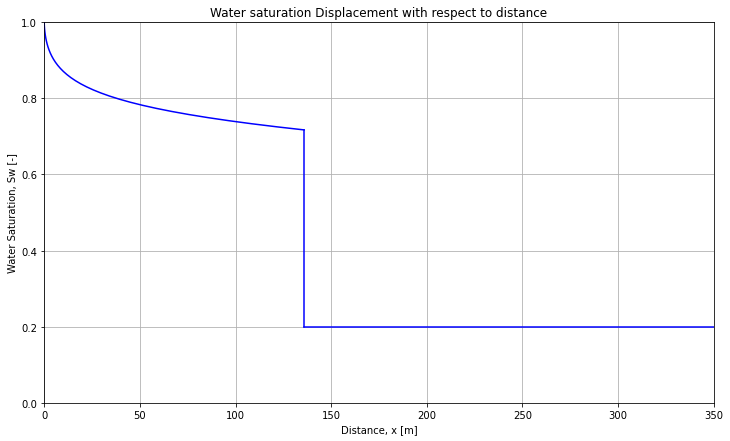

In [13]:
Sor=0.2                        # % Residual oil saturation
Swc=0.2                        # % Initial water saturation
Sw = np.linspace(0.2001,0.9999,100)    # % Water saturation [-]

A = 25                        # % Cross-sectional area [m^2]
L = 500                       #  % Reservoir length [m]
Bo = 1.25 
iw = 0.2                      #  % Water injection rate [m^3/day]
t = 1461                      #    % Duration of injection [days]
phi=0.15                      #  % Porosity [-]

n=2.5                        #     % Corey's oil exponent [-]
m=4.8                        #     % Corey's water exponent [-]
mu_w=0.5                     #   % Water viscosity [mPa.s]
mu_o=2.5                     #     % Oil viscosity [mPa.s]

kro = ((1-Sw)/(1-Swc))**n   #   % Water relative permeability [-]
krw = ((Sw-Swc)/(1-Swc))**m #   % Oil relative permeability [-]
M=(krw*mu_o)/(kro*mu_w)     #    % Mobility Ratio [-]
fw = M/(M+1)                #   % Water fractional flow [-]
dfw = np.gradient(fw,Sw);      #    % Derivative of water fractional flow [-]
x = iw*t/(A*phi)*dfw;      #% Distance covered by water [m]

#===============================At Front=================================
a=fw/(Sw-Swc)               #% a is the slope dfw/dSw
a_max=np.max(a)              #   % a_max Maximal value of vector a
tang = (a_max)*(Sw-Swc)     #% Tangent in the form of y=a_max*Sw-a_max*Swc
ptr=np.argmax(a)           #% Finding the position of the element equal
                              #% to a_max in the vector a.
xF = x[64] # Water position at the front [m]
vF = xF/t                  #% Water velocity at the front [m/day]
SwF = Sw[64]                # % Water saturation at the front [-]
fwF = a_max*(SwF-Swc)        #% Water fractional flow at the front [-]

xG=x[64:100]
SwG=Sw[64:100]

# ===========================At Breakthrough=============================
PV=(phi*A*L)                    # % Total flooded pattern Pore Volume [m^3]
t_BT=(PV)/(iw*dfw[64])        # % Breakthrough time [days]
PV2=1/dfw[64]
# =============================Average Sw===================================
SwAV=(SwF+Swc*(fwF-1))/(fwF);     # Average water saturation [-]
#
# ========================Recovery Factor at BT=============================
EDBT = (SwAV-Swc)/(1-Swc)    #%Displacement efficiency @ BT [-]
WiBT = t_BT*iw               #%Cumulative water injection @ BT [m^3]
NpBT = WiBT/Bo               #%Cumulative oil production @ BT [-] for Sgi=0

## ===================================Plot===================================
xSwF = np.linspace(xF,xF,100)
ySwF = np.linspace(SwF,Swc,100)
xSwc = np.linspace(xF,L,100)
ySwc = np.linspace(Swc,Swc,100)
xSwAV= np.linspace(0,L,100)
ySwAV= np.linspace(1-Sor,SwAV,100)
xAV= np.linspace(L,L,100)
yAV=np.linspace(SwAV,Swc,100)

plt.figure(figsize=(12, 7))
plt.plot(xG,SwG,'b',xSwF,ySwF,'b-',xSwc,ySwc,'b-')

plt.title('Water saturation Displacement with respect to distance')
plt.xlabel('Distance, x [m]');
plt.ylabel('Water Saturation, Sw [-]');
plt.xlim(0,350);
plt.ylim(0,1);
plt.grid()

In [11]:
xF

135.87462961021993

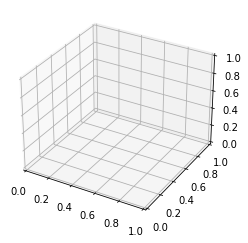

In [5]:
from mpl_toolkits import mplot3d

%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')

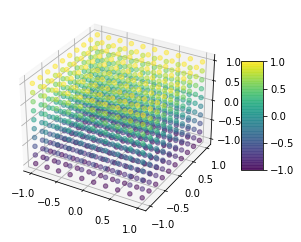

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = np.mgrid[-1:1:10j, -1:1:10j, -1:1:10j]

T = np.exp(-X**2 - Y**2 - Z**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X, Y, Z, c=Z.flatten(), alpha=0.5)
fig.colorbar(scat, shrink=0.5, aspect=5)

In [8]:
import pyvista as pv
import numpy as np

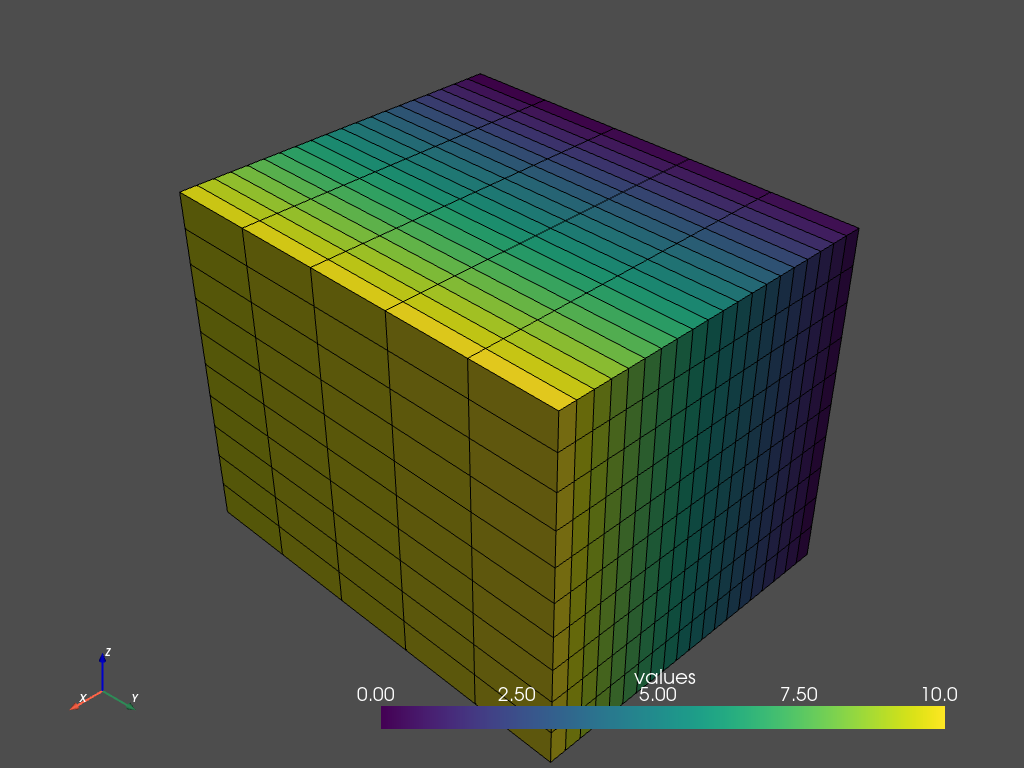

[(152.10373063750072, 87.60373063750072, 107.70373063750071),
 (110.0, 45.5, 65.6),
 (0.0, 0.0, 1.0)]

In [9]:
values = np.linspace(0, 10, 1000).reshape((20, 5, 10))
values.shape

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_arrays["values"] = values.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True)

In [13]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pytest
from helpers import *
from scipy.io import loadmat

class TestGravityColumn:

    def test_gravityColumn(self):
        import numpy as np

        import prst
        import prst.incomp as incomp
        import prst.gridprocessing as gridprocessing
        import prst.utils as utils
        import prst.params as params
        import prst.solvers as solvers
        from prst.utils.units import centi, poise, kilogram, meter, bar, darcy

        prst.gravity_reset()
        G = gridprocessing.cartGrid([1, 1, 30], [1, 1, 30])
        gridprocessing.computeGeometry(G)
        rock = params.rock.Rock(G, perm=0.1*darcy, poro=1)
        fluid = incomp.fluid.SingleFluid(viscosity=1*centi*poise,
                                         density=1014*kilogram/meter**3)
        bc = params.wells_and_bc.BoundaryCondition()
        bc.addPressureSide(G, "top", 100*bar)
        T = solvers.computeTrans(G, rock)
        resSol = solvers.initResSol(G, p0=0.0)
        psol = incomp.incompTPFA(resSol, G, T, fluid, bc=bc)

        # Load MRST results and compare solution pressure, flux, saturation,
        # facePressure.
        matfile = getpath("test_example_gravityColumn/sol.mat")
        msol = loadmat(matfile, squeeze_me=True, struct_as_record=False)["sol"]
        msol_pressure = np.atleast_2d(msol.pressure).transpose()
        msol_flux = np.atleast_2d(msol.flux).transpose()
        msol_s = np.atleast_2d(msol.s).transpose()
        msol_facePressure = np.atleast_2d(msol.facePressure).transpose()

        assert np.allclose(psol.pressure, msol_pressure, rtol=1e-11)
        assert np.allclose(psol.flux, msol_flux, rtol=1e-11)
        assert np.allclose(psol.s, msol_s, rtol=1e-11)
        assert np.allclose(psol.facePressure, msol_facePressure, rtol=1e-11)